<a href="https://colab.research.google.com/github/codebjjung/DATA_ANALYSIS/blob/main/KMeans_clustering_with_non_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KMeans clustering
# 1. 군집 갯수 설정 // 2. 초기 중심점 설정 // 3. 데이터 군집에 배정 // 4. 중심점 재설정 // 5. 데이터 재배정

In [91]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [107]:
cd /content/gdrive/MyDrive/Colab Notebooks/open/

/content/gdrive/MyDrive/Colab Notebooks/open


In [119]:
#dataset
df = pd.read_csv('data.csv')
numpy_array = df.to_numpy()
np.random.seed(0)
X = numpy_array
#data = np.random.rand(100,2)
#np.array([[175,63],
            # [166,58],
            # [171,68],
            # [161,63],
            # [171,53]])

In [122]:
# K-Means 알고리즘 구현
def kmeans(X, k, max_iters=100):
    # 2. 초기 중심점 설정
    np.random.shuffle(X)
    centroids = X[:k]

    for _ in range(max_iters):
        # 3. 데이터 군집에 배정
        labels = np.argmin(np.linalg.norm(X[:,np.newaxis] - centroids, axis=2), axis=1)

        # 4. 중심점 재설정
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # 클러스터 중심이 수렴하면 종료
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# 클러스터 실행
k = 2
centroids, labels = kmeans(X, k)

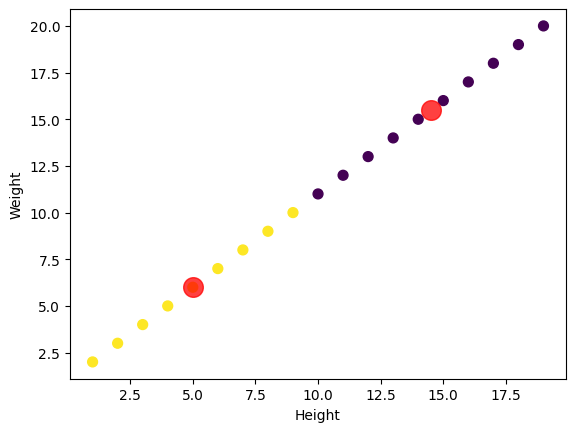

In [126]:
# 결과 시각화
plt.scatter(X[:,0], X[:,1], c=labels, s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.75)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()